# Практика №5
## Проста лінійна регресія. Метод найменших квадратів.

In [1]:
# імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#### Генерування даних для навчання моделі

In [2]:
X, Y = make_regression(n_samples=300, n_features=1, n_informative=1,
                       noise=5, random_state=10)

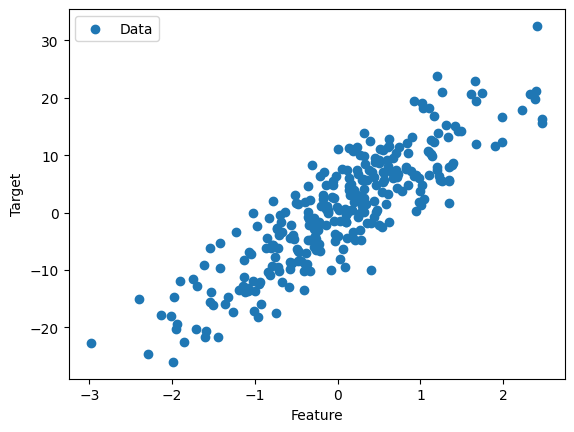

In [3]:
plt.scatter(X, Y, label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [4]:
print(X.shape)

(300, 1)


In [5]:
print(Y.shape)

(300,)


#### Завдання №1

*Мета*: знаючи характер функціональної залежності, підібрати її параметри так, щоб вона найкраще описувала експериментальні дані $y_i$.

Розглянемо на прикладі простої лінійної функції:
$$f(x) = \omega_1x + \omega_0$$

Для такої простої лінійної функції достатньо визначити лише два параметри $\omega_1$ та $\omega_0$ для того, щоб побудувати наближення лінійного графіка до експериментальних даних.

Одним з головних критеріїв апроксимації є сума квадратів помилок відхилень:
$$ E = \[ \sum_{i=1}^{N} (y_i - f(x_i))^2 \]
$$

У методі найменших квадратів використовується мінімум суми квадратів помилок.

Знаходження параметрів виконується наступним чином:

$$ \omega_1 = \frac{\alpha_1 - m_xm_y}{\alpha_2 - m_x^2}$$

$$ \omega_0 = m_y - \omega_1 m_x$$

$$ \alpha_1 = \frac{1}{N}\sum_{i=1}^{N} y_ix_i$$

$$ \alpha_2 = \frac{1}{N}\sum_{i=1}^{N} x_i^2 $$

$$ m_x =  \frac{1}{N}\sum_{i=1}^{N} x_i $$

$$ m_y =  \frac{1}{N}\sum_{i=1}^{N} y_i $$

Наприкінці вивести отримані значення параметрів моделі і результат у вигляді вписаної прямої представити на графіку.

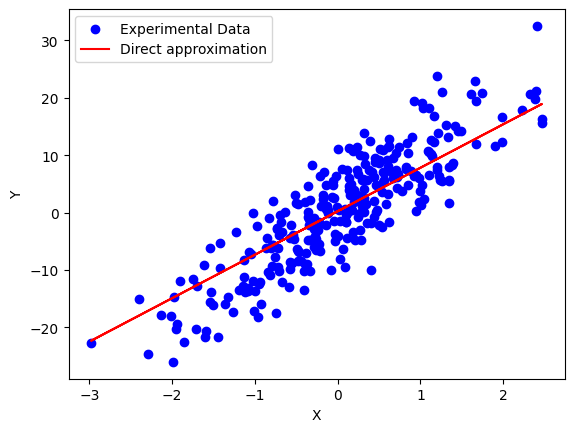

In [6]:
# Ваш код
N = len(X)
alpha1 = np.sum(Y * X) / N
alpha2 = np.sum(X ** 2) / N
mx = np.mean(X)
my = np.mean(Y)
omega1 = (alpha1 - mx * my) / (alpha2 - mx ** 2)
omega0 = my - omega1 * mx
plt.scatter(X, Y, color='blue', label='Experimental Data')
plt.plot(X, omega1 * X + omega0, color='red', label='Direct approximation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Завдання №2

Побудуйте модель лінійної регресії за допомогою модуля *LinearRegression*. Виведіть отримані параметри моделі і порівняйте їх зі своєю реалізацією.


method of least squares
w1 : 7.574170409211588
w0 : 0.24308344049966873
LinearRegression
w1 : 9.157446229603474
w0 : 0.17726756904466923


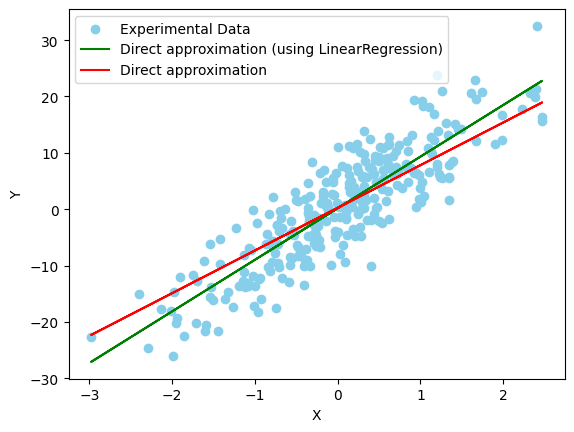

In [11]:
# Ваш код
model = LinearRegression()
model.fit(X, Y)
omega1_sklearn = model.coef_[0]
omega0_sklearn = model.intercept_

print("method of least squares")
print(f"w1 : {omega1}")
print(f"w0 : {omega0}")
print("LinearRegression")
print(f"w1 : {omega1_sklearn}")
print(f"w0 : {omega0_sklearn}")

plt.scatter(X, Y, color='skyblue', label='Experimental Data')
plt.plot(X, model.predict(X), color='green', label='Direct approximation (using LinearRegression)')
plt.plot(X, omega1 * X + omega0, color='red', label='Direct approximation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()